<a href="https://colab.research.google.com/github/Timansamal046/Real-Estate-Analysys/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/gurgaon_properties_post_feature_selection_v2.csv")

In [ ]:
data.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
85,flat,sector 69,1.36,3.0,3.0,2,Relatively New,1428.0,0.0,0.0,1.0,Low,High Floor
1775,house,sector 15,10.00,5.0,5.0,2,Old Property,4518.0,0.0,0.0,0.0,Low,Low Floor
1668,flat,sector 33,1.35,3.0,2.0,3+,Under Construction,1484.0,0.0,0.0,0.0,Low,Mid Floor
3043,flat,sector 49,4.21,5.0,6.0,3+,Relatively New,3219.0,1.0,0.0,0.0,Low,High Floor
3052,house,sector 43,5.30,3.0,9.0,3+,Moderately Old,1935.0,1.0,0.0,1.0,Medium,Mid Floor


In [ ]:
data.shape

(3554, 13)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
data.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,0.0,High,Mid Floor


In [ ]:
data["furnishing_type"] = data["furnishing_type"].replace({0.0 : "unfurnished", 1.0 : "semifurnished", 2.0 : "furnished"})
data


,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,semifurnished,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,unfurnished,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,flat,sector 84,0.37,2.0,2.0,1,Relatively New,532.0,0.0,0.0,unfurnished,Medium,Mid Floor
3550,house,sector 109,6.00,5.0,5.0,3+,Relatively New,6228.0,1.0,1.0,unfurnished,High,Low Floor
3551,flat,sector 2,0.60,1.0,1.0,1,Moderately Old,665.0,0.0,0.0,semifurnished,Medium,Mid Floor
3552,house,sector 43,15.50,5.0,6.0,3,Moderately Old,5490.0,1.0,1.0,unfurnished,Medium,Mid Floor


In [ ]:
data["furnishing_type"].value_counts()

,count
furnishing_type,
unfurnished,2349
semifurnished,1018
furnished,187


In [ ]:

x = data.drop(columns = ["price"])

y = data["price"]

In [ ]:
x.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor
3,flat,sector 92,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,semifurnished,High,Mid Floor
4,flat,sector 102,2.0,2.0,1,Relatively New,582.0,0.0,1.0,unfurnished,High,Mid Floor


In [ ]:
columns_to_encode = ["property_type", "sector", "balcony",
                     "agePossession", "furnishing_type", "luxury_category", "floor_category"]

In [ ]:
columns_to_encode

['property_type',
 'sector',
 'balcony',
 'agePossession',
 'furnishing_type',
 'luxury_category',
 'floor_category']

Transformer

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), ["bedRoom", "bathroom", "built_up_area", "servant room", "store room"]),
        ("cat", OrdinalEncoder(), columns_to_encode)
    ], remainder = "passthrough"
)

In [ ]:
# Pipeline

pipline = Pipeline([
    ("preprocessor", preprocessor),
    ("regression", LinearRegression())
])

<ipython-input-151-7b066a789bfb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data["price"])


<Axes: xlabel='price', ylabel='Density'>

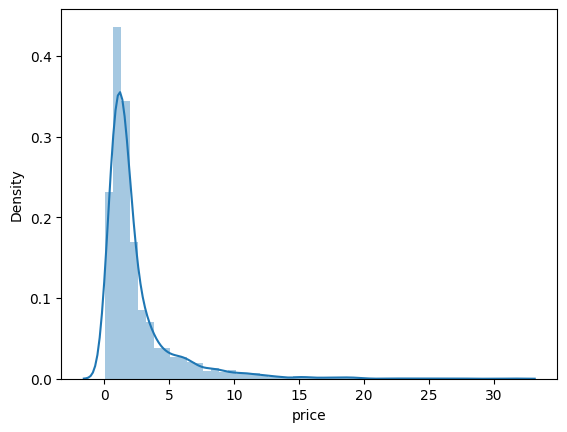

In [ ]:
import seaborn as sn
sn.distplot(data["price"])

In [ ]:
#Apply log1p on the target columnfor reduce the skewness
y_transformed = np.log1p(y)


<ipython-input-153-7f7c078e0d15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y_transformed)


<Axes: xlabel='price', ylabel='Density'>

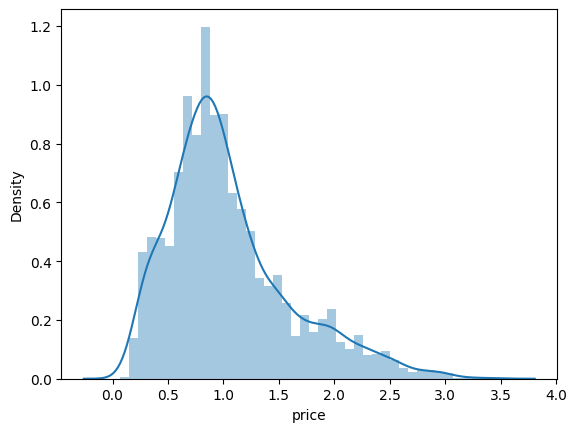

In [ ]:
sn.distplot(y_transformed)

In [ ]:

kfold = KFold(n_splits = 10, shuffle = True, random_state = 45)

In [ ]:
cross = cross_val_score(pipline, x, y_transformed, cv = kfold, scoring = "r2")

In [ ]:
cross.mean()

np.float64(0.7368542847945332)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size = 0.2, random_state = 45)

In [ ]:
pipline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regression', LinearRegression())])

In [ ]:
y_pred = pipline.predict(x_test)
y_pred = np.expm1(y_pred)

In [ ]:
mean_absolute_error(np.expm1(y_test), y_pred)

0.8624485477614584

In [ ]:
def scorer(model_name, model):

    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

    output.append(scores.mean())

    X_train, X_test, y_train, y_test = train_test_split(x,y_transformed,test_size=0.2,random_state=42)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    y_pred = np.expm1(y_pred)

    output.append(mean_absolute_error(np.expm1(y_test),y_pred))

    return output

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


In [ ]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [ ]:
models_score = []

for model_name, model in model_dict.items():
    print("trainn model", model_name)
    print("=======================================")
    models_score.append(scorer(model_name, model))

    print("============done trainng ========================")

trainn model linear_reg
============done trainng ========================
trainn model svr
============done trainng ========================
trainn model ridge
============done trainng ========================
trainn model LASSO
============done trainng ========================
trainn model decision tree
============done trainng ========================
trainn model random forest
============done trainng ========================
trainn model extra trees
============done trainng ========================
trainn model gradient boosting
============done trainng ========================
trainn model adaboost
============done trainng ========================
trainn model mlp
============done trainng ========================
trainn model xgboost
============done trainng ========================


In [ ]:
models_score

[['linear_reg', np.float64(0.7363096633436828), 0.946382216008936],
 ['svr', np.float64(0.7642021216646014), 0.8472636473483917],
 ['ridge', np.float64(0.7363125343993554), 0.9463387741853388],
 ['LASSO', np.float64(0.05943378064493573), 1.528905986892753],
 ['decision tree', np.float64(0.7754123618676797), 0.7448166865521207],
 ['random forest', np.float64(0.8819142278557489), 0.5395461885024982],
 ['extra trees', np.float64(0.8678387539004149), 0.5490041052019191],
 ['gradient boosting', np.float64(0.8726517199942204), 0.575912719919243],
 ['adaboost', np.float64(0.7585702075969952), 0.8416170960384811],
 ['mlp', np.float64(0.8096306339109891), 0.733493047354961],
 ['xgboost', np.float64(0.8894876835260124), 0.5040475127230885]]

In [ ]:

score_df = pd.DataFrame(models_score, columns = ["Model Name", "r2", "error"])

In [ ]:
score_df.sort_values("error")

,Model Name,r2,error
10,xgboost,0.889488,0.504048
5,random forest,0.881914,0.539546
6,extra trees,0.867839,0.549004
7,gradient boosting,0.872652,0.575913
9,mlp,0.809631,0.733493
4,decision tree,0.775412,0.744817
8,adaboost,0.758570,0.841617
1,svr,0.764202,0.847264
2,ridge,0.736313,0.946339
0,linear_reg,0.736310,0.946382


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
columns_to_encode = ["property_type", "sector", "balcony",
                     "agePossession", "furnishing_type", "luxury_category", "floor_category"]

preprocessers = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), ["bedRoom", "bathroom", "built_up_area", "servant room", "store room"]),
        ("cat", OrdinalEncoder(), columns_to_encode),
        ("ohe", OneHotEncoder(), ["agePossession"]),
        ("target_enc", ce.TargetEncoder(), ["sector"])
    ], remainder = "passthrough"
)

In [ ]:
pipline_ohe = Pipeline([
    ("preprocessor" , preprocessers),
    ("regressor", LinearRegression())
])

In [ ]:
cross.mean()

np.float64(0.7368542847945332)

In [ ]:
preprocessers = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), ["bedRoom", "bathroom", "built_up_area", "servant room", "store room"]),
        ("cat", OrdinalEncoder(), columns_to_encode),
        ("ohe", OneHotEncoder(drop = "first", sparse_output = False), ["agePossession","sector"]),
    ]
)

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessers),
    ("regresser", RandomForestRegressor(n_estimators = 500))
])

In [ ]:
pipeline.fit(x, y_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['agePossession',
                                                   'sector'])])),
                ('regresser', RandomForestRegressor(n_estimators=500))])

In [ ]:
import pickle

In [ ]:
with open("pipeline.pkl", "wb") as file:
    pickle.dump(pipeline, file)

In [ ]:
with open("df.pkl", "wb") as file:
    pickle.dump(x, file)

In [ ]:
data

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,unfurnished,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,unfurnished,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,unfurnished,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,semifurnished,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,unfurnished,High,Mid Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,flat,sector 84,0.37,2.0,2.0,1,Relatively New,532.0,0.0,0.0,unfurnished,Medium,Mid Floor
3550,house,sector 109,6.00,5.0,5.0,3+,Relatively New,6228.0,1.0,1.0,unfurnished,High,Low Floor
3551,flat,sector 2,0.60,1.0,1.0,1,Moderately Old,665.0,0.0,0.0,semifurnished,Medium,Mid Floor
3552,house,sector 43,15.50,5.0,6.0,3,Moderately Old,5490.0,1.0,1.0,unfurnished,Medium,Mid Floor


In [ ]:
columns = ['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony','agePossession', 'built_up_area',
           'servant room', 'store room','furnishing_type', 'luxury_category', 'floor_category']

In [ ]:
values = ["flat", "sector 36", 3.0, 2.0, "2", "New Property", 850.0, 0.0, 0.0, "unfurnished", "Low", "Low Floor"]

In [ ]:
for_pred = pd.DataFrame([values], columns = columns)

In [ ]:
np.expm1x(pipeline.predict(for_pred))

array([0.78546118])